In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [146]:
df = pd.read_excel('digital_marketing_campaign_dataset.xlsx')

# **I. Phân cụm khách hàng** 

## **1. Phân cụm theo nhân khẩu và hành vi mua trước đó bằng Kmeans để tìm K tối ưu**


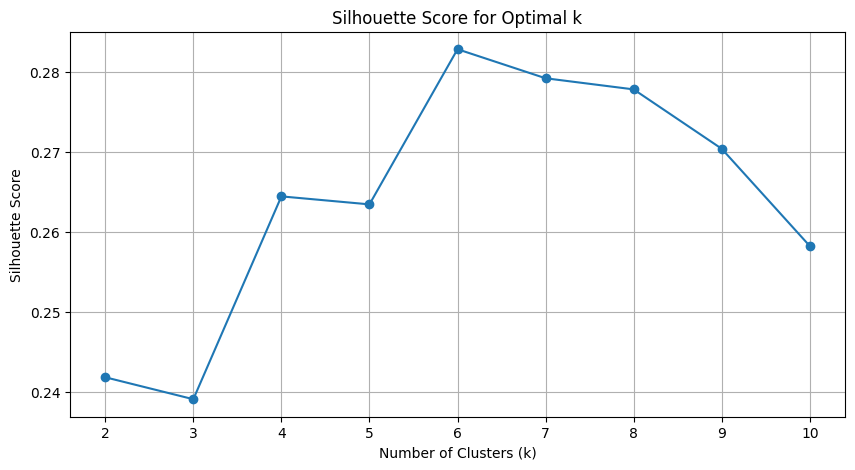

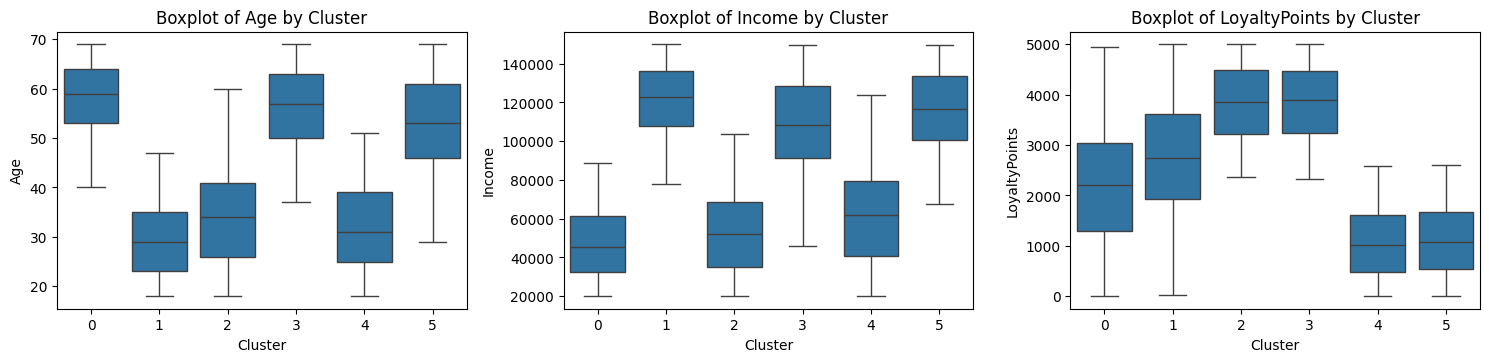

In [166]:
# 1. Chọn các đặc trưng để phân cụm
features = df[["Age", "Income", "LoyaltyPoints"]]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Tính Silhouette Score cho từng số cụm
range_k = range(2, 11)  # Kiểm tra từ 2 đến 10 cụm
silhouette_scores = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Vẽ đồ thị Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid()
plt.show()

# 5. Phân cụm với số cụm tối ưu dựa trên Silhouette Score
optimal_k = range_k[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['K-means_Cluster'] = kmeans.fit_predict(scaled_features)

# 6. Vẽ boxplot để thể hiện sự khác biệt giữa các đặc trưng
plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='K-means_Cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


### => Theo biểu đồ, ta có thể chọn K = 4 là hợp lý nhất vì:            
            - Silhouette Score = 0,265 không thấp hơn đáng kể so với Silhouette Score = 0,28 khi K = 6
            - Dễ dàng cho doanh nghiệp khi đặt tên, định vị nhóm khách hàng hơn. 


## **2. Với K = 4, thực hiện đánh giá hiệu quả phân cụm của thuật toán K - Means và thuật toán Hierachical Clustering bằng Silhouette Score**

## **2.1. K - Means Cluster**

Silhouette Score for K - Means: 0.2644
K-means_Cluster                  0              1              2  \
Age           count    2003.000000    2021.000000    1976.000000   
              mean       52.237644      31.319149      34.198887   
              std        11.158581       9.057111      10.864245   
              min        18.000000      18.000000      18.000000   
              25%        45.000000      24.000000      25.000000   
              50%        53.000000      30.000000      33.000000   
              75%        61.000000      38.000000      42.000000   
              max        69.000000      57.000000      65.000000   
Income        count    2003.000000    2021.000000    1976.000000   
              mean    65797.573140  116611.915883   51634.230769   
              std     30765.704297   22372.935114   22003.986138   
              min     20018.000000   47846.000000   20014.000000   
              25%     40033.000000  101449.000000   32775.250000   
         

C:\Users\HP\AppData\Local\Temp\ipykernel_18380\3419812171.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K-means_Cluster', y=column, data=df, palette=cluster_colors)
C:\Users\HP\AppData\Local\Temp\ipykernel_18380\3419812171.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K-means_Cluster', y=column, data=df, palette=cluster_colors)
C:\Users\HP\AppData\Local\Temp\ipykernel_18380\3419812171.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K-means_Cluster', y=column, data=df, palette=cluster_colors)


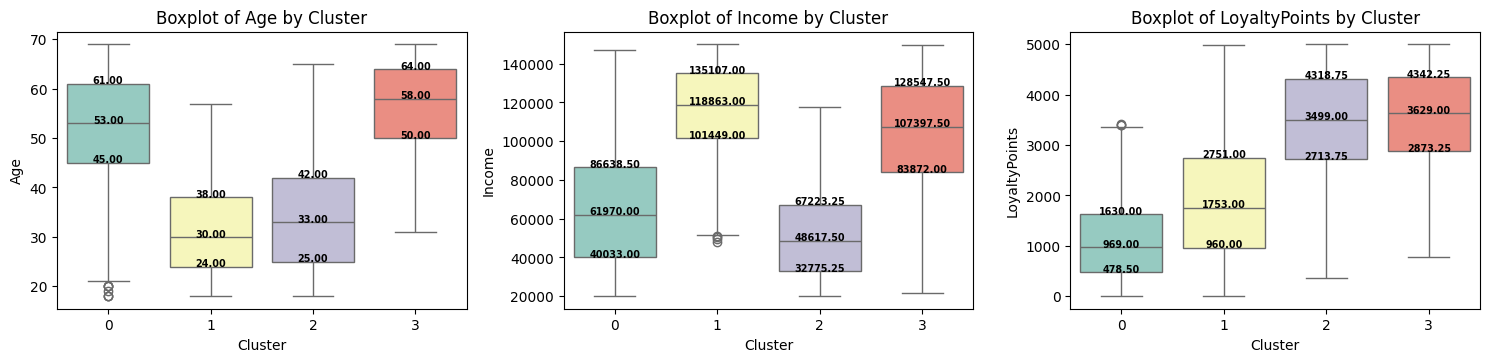

In [196]:
# 1. Chọn các đặc trưng để phân cụm
features = df[["Age", "Income", "LoyaltyPoints"]]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Phân cụm với k cố định là 4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['K-means_Cluster'] = kmeans.fit_predict(scaled_features)

# 4. In ra Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df['K-means_Cluster'])
print(f'Silhouette Score for K - Means: {silhouette_avg:.4f}')


# 5. Phân tích mô tả cho các cụm
cluster_description = df.groupby('K-means_Cluster')[features.columns].describe().T
print(cluster_description)

# 6 Vẽ boxplot phân phối giữa các cụm
cluster_colors = sns.color_palette("Set3", n_colors=df['K-means_Cluster'].nunique())
plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='K-means_Cluster', y=column, data=df, palette=cluster_colors)
    
    # Thêm các chỉ số 25%, 50%, 75% vào boxplot
    for j in range(df['K-means_Cluster'].nunique()):
        q25 = df[df['K-means_Cluster'] == j][column].quantile(0.25)
        q50 = df[df['K-means_Cluster'] == j][column].median()
        q75 = df[df['K-means_Cluster'] == j][column].quantile(0.75)
        
        # Vị trí nhãn trên biểu đồ
        xpos = j
        ypos = q50
        
        plt.text(xpos, q25, f'{q25:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, ypos, f'{q50:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, q75, f'{q75:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
    
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()



## **2.2. Hierachical Cluster**

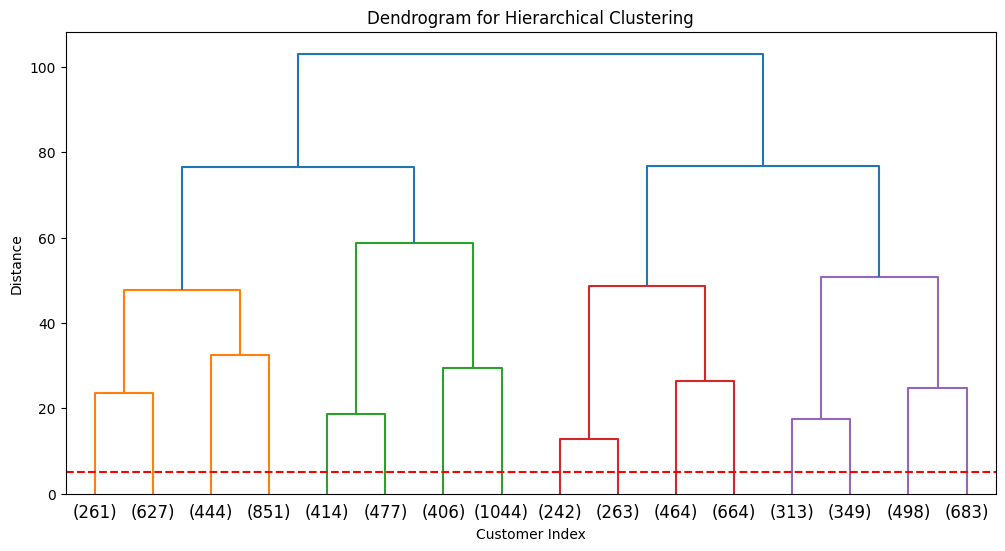

Silhouette Score for Hierarchical Clustering: 0.21065151145173808 with K = 4


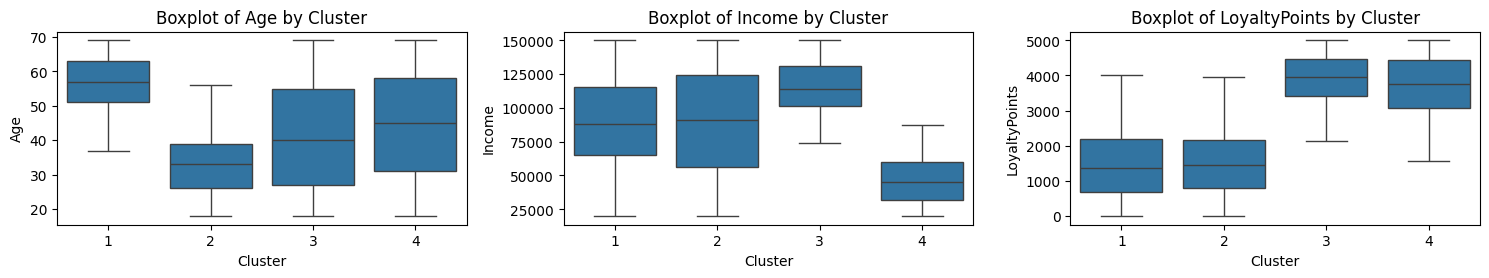

In [195]:

# 1. Chọn các đặc trưng để phân cụm
features = df[["Age", "Income", "LoyaltyPoints"]]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Tính ma trận khoảng cách và xây dựng cây phân cấp
Z = linkage(scaled_features, method='ward')

# 4. Vẽ dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.axhline(y=5, color='r', linestyle='--')  # Đường cắt để xác định số cụm
plt.show()

# 5. Phân cụm dựa trên số cụm đã chọn (giả sử chọn 4 cụm từ dendrogram)
num_clusters = 4
df['Hierarchical_Cluster'] = fcluster(Z, num_clusters, criterion='maxclust')

# 6. Tính Silhouette Score cho các cụm phân cấp
silhouette_avg = silhouette_score(scaled_features, df['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg} with K = {num_clusters}")

# 7. Vẽ boxplot để thể hiện sự khác biệt giữa các đặc trưng
plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Hierarchical_Cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### **Kết luận**: Thuật toán K - Means Cluster cho kết quả Silhouette Score tốt hơn so với Hierarchical Cluster với cùng số cụm K = 4 (0.26 > 0.24).                                                                       Vậy ta lựa chọn K - Means Cluster để thực hiện việc phân cụm khách hàng cho bài toán. 

## **3. Đặt tên các cụm khách hàng dựa trên các đặc điểm đã được trực quan**

### **Cụm 0: "Lớn tuổi - Truyền thống"**	
    Độ tuổi: 45 - 61
    Thu nhập: 40K - 86K
    Điểm trung thành: 480 - 1,600
    Đặc điểm: Nhóm khách hàng trung niên, thu nhập trung bình và điểm trung thành thấp nhất. Đây là tệp khách hàng truyền thống, ít quan tâm, hưởng ứng với các chiến dịch
### **Cụm 1: "Trẻ tuổi - tiềm năng"**
    Độ tuổi: 24 - 38
    Thu nhập: 101K - 135K
    Điểm trung thành: 960 - 2800
    Đặc điểm: Nhóm này có độ tuổi trẻ trung nhưng lại có nguồn thu nhập rất cao và điểm trung thành ở mức trung bình khá, rất tiềm năng
### **Cụm 2: "Trẻ tuổi - Trung thành"**
    Độ tuổi: 25 - 42
    Thu nhập: 33K - 68K
    Điểm trung thành: 2,800 - 4,400
    Đặc điểm: Nhóm khách hàng trẻ trung, có thu nhập trung bình nhưng điểm tích luỹ cao, là tệp khách hàng trung thành, thường xuyên sử dụng dịch vụ.
### **Cụm 3: "VIP - Lâu năm"**
    Độ tuổi: 50 - 64
    Thu nhập: 83K - 129K
    Điểm trung thành: 2,900 - 4,400
    Đặc điểm: Nhóm khách hàng có giá trị cao nhất,  gắn bó lâu năm, và có đóng góp tích cực cho doanh nghiệp


# **II. EDA các cụm**

## **1. Tỉ lệ phân phối giữa các cụm** 


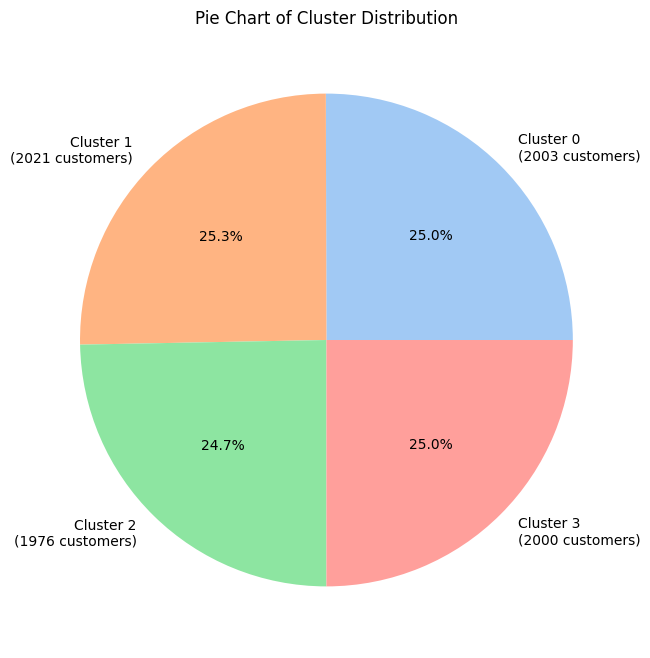

In [197]:
# Lấy danh sách các cụm
clusters = sorted(df['K-means_Cluster'].unique())
n_clusters = len(clusters)

# Tính số lượng mẫu trong mỗi cụm
cluster_counts = df['K-means_Cluster'].value_counts().sort_index()

# Gắn nhãn với số lượng khách hàng
labels = [f'Cluster {i}\n({count} customers)' for i, count in zip(clusters, cluster_counts)]

# Vẽ biểu đồ pie cho phân phối số lượng của các cụm
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Cluster Distribution')
plt.show()

## **2. Xem mức chi phí quảng cáo trung bình cho mỗi cụm KH** 


C:\Users\HP\AppData\Local\Temp\ipykernel_18380\2845739534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='K-means_Cluster', y='AdSpend', data=mean_AdSpend, palette='pastel')


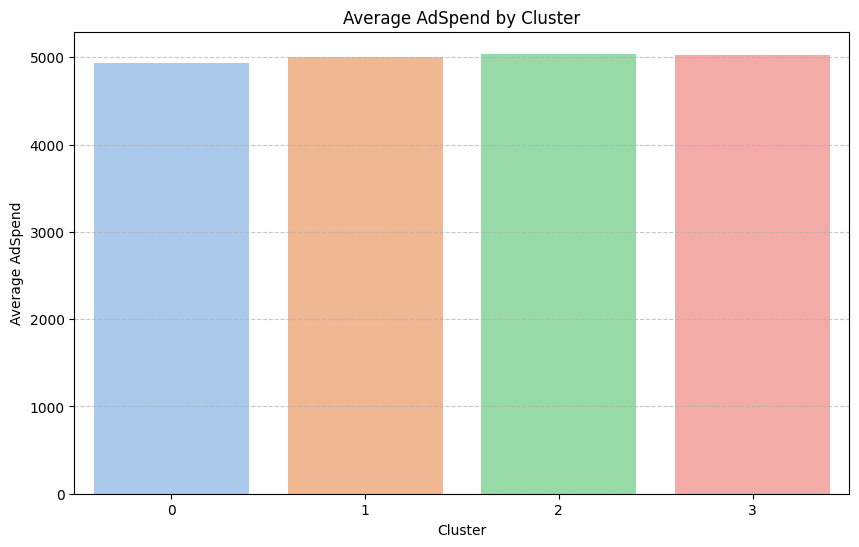

In [198]:
# Tính AdSpend trung bình cho các cụm
mean_AdSpend = df.groupby('K-means_Cluster')['AdSpend'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='K-means_Cluster', y='AdSpend', data=mean_AdSpend, palette='pastel')
plt.title('Average AdSpend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average AdSpend')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Nhận xét:** Không có sự khác biệt giữa ngân sách quảng cáo giữa các nhóm

## **3. Đánh giá hiệu quả chuyển đổi của chiến dịch đối với các cụm khách hàng**

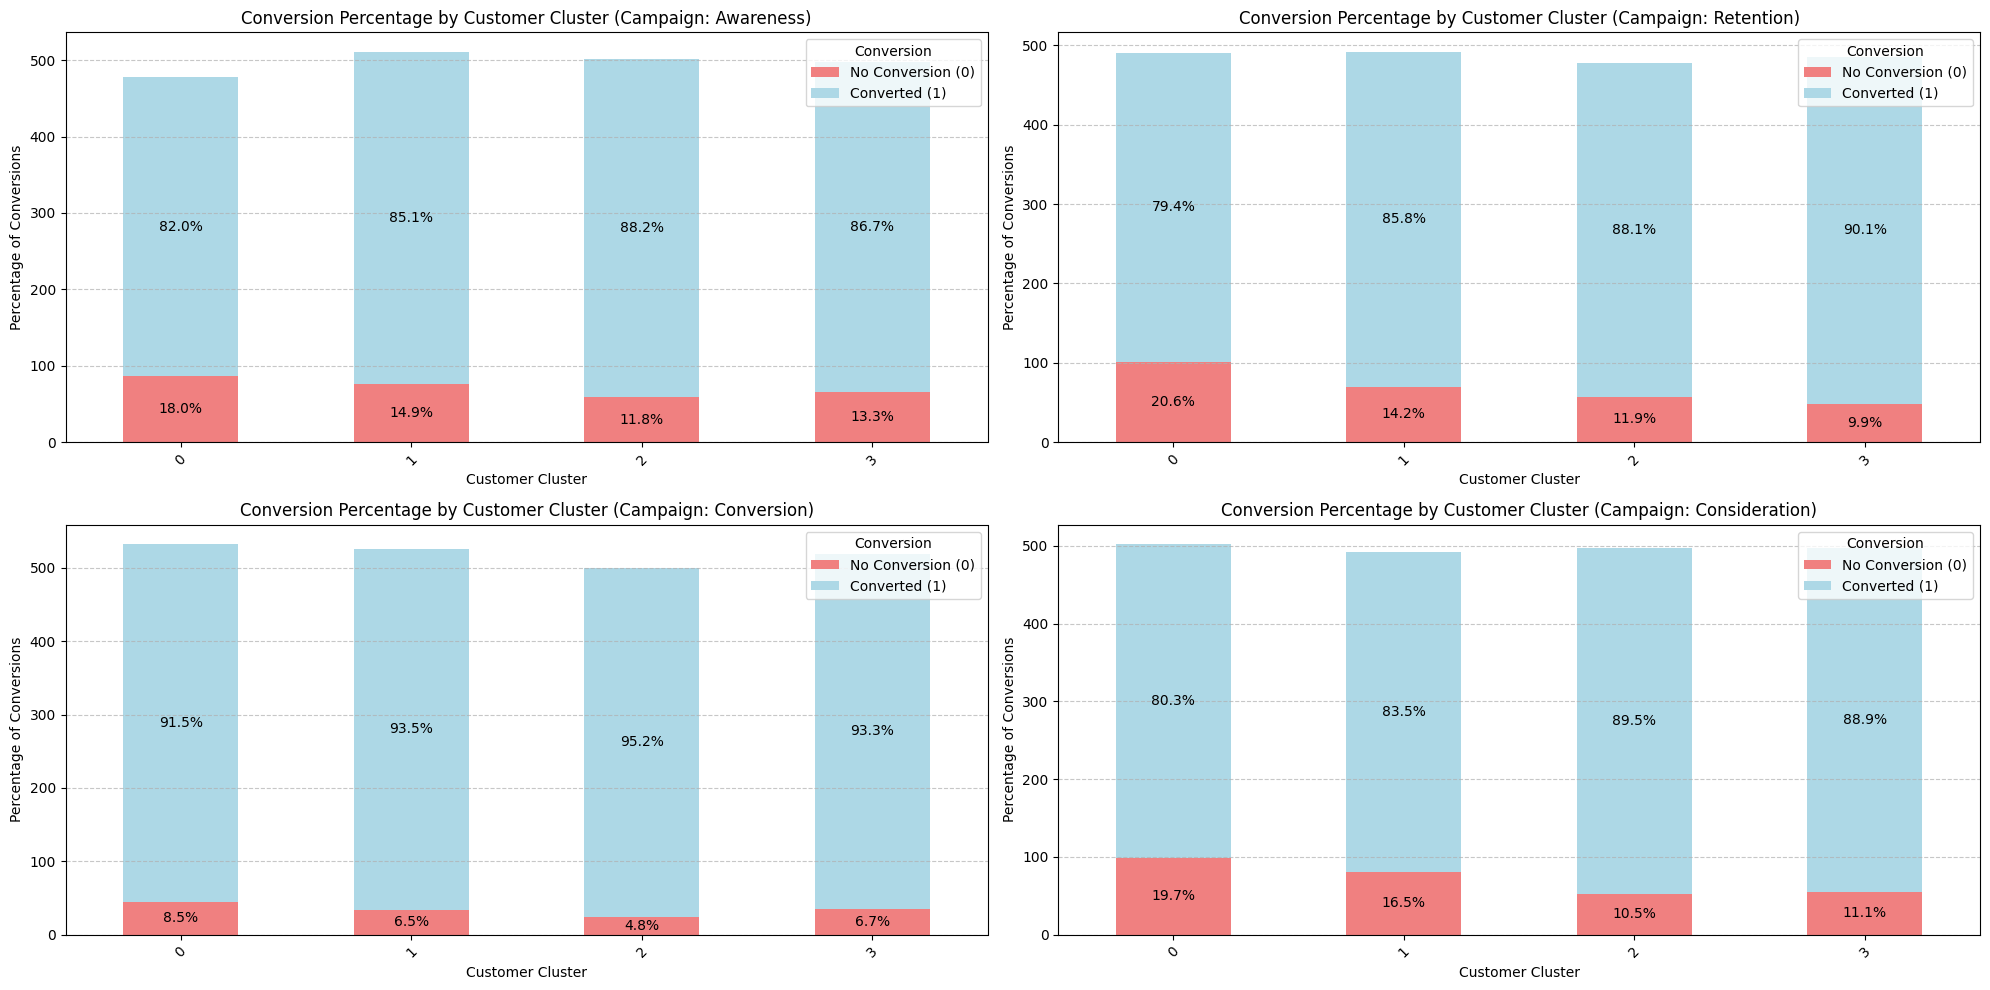

In [199]:
# Lấy danh sách các chiến dịch
campaign_types = df['CampaignType'].unique()
n_campaigns = len(campaign_types)

# Tạo subplots cho từng chiến dịch, 2 biểu đồ mỗi hàng
fig, axes = plt.subplots(nrows=(n_campaigns + 1) // 2, ncols=2, figsize=(20, 10))

for i, campaign in enumerate(campaign_types):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Lọc dữ liệu theo chiến dịch
    campaign_data = df[df['CampaignType'] == campaign]

    # Tính tổng số lượng conversion (0 và 1) cho mỗi cụm trong chiến dịch đó
    conversion_counts = campaign_data.groupby('K-means_Cluster')['Conversion'].value_counts().unstack(fill_value=0)

    # Tính tỷ lệ phần trăm chuyển đổi cho mỗi cụm
    conversion_percentage = conversion_counts.div(conversion_counts.sum(axis=1), axis=0) * 100

    # Vẽ stacked bar chart cho chiến dịch
    conversion_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'lightblue'])

    # Thêm nhãn tỷ lệ phần trăm cho cả hai phần của stacked bar
    for j in range(len(conversion_counts)):
        bottom = 0  # Khởi tạo giá trị bottom cho mỗi cột
        for k in range(len(conversion_counts.columns)):
            # Lấy giá trị phần trăm
            percentage = conversion_percentage.iloc[j, k]
            # Đặt nhãn ở giữa của phần stacked bar
            height = conversion_counts.iloc[j, k]
            # Kiểm tra nếu giá trị height khác 0 để tránh lỗi hiển thị
            if height > 0:
                ax.text(j, bottom + height / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black')
            # Tích lũy độ cao cho phần tiếp theo
            bottom += height

    # Thiết lập tiêu đề và nhãn cho từng biểu đồ
    ax.set_title(f'Conversion Percentage by Customer Cluster (Campaign: {campaign})')
    ax.set_xlabel('Customer Cluster')
    ax.set_ylabel('Percentage of Conversions')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Conversion', labels=['No Conversion (0)', 'Converted (1)'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ẩn các subplot trống nếu số lượng chiến dịch là số lẻ
if n_campaigns % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()


### **Nhận xét**: Những điểm đáng chú ý qua 4 biểu đồ trên: 
        + Chiến dịch Conversion luôn đem về tỉ lệ chuyển đổi cao nhất trong tất cả các chiến dịch (đền trên 91.5%)
        + Đa số nhóm khách hàng đều phản ứng tốt các chiến dịch marketing. Trong đó những khách hàng “VIP - Lâu năm” và “Trẻ tuổi - Trung thành” có tỷ lệ chuyển đổi cao nhất trong hầu hết các chiến dịch, cho thấy rằng tệp khách hàng này không chỉ có giá trị cao nhất mà còn hưởng ứng rất tốt với các chiến dịch. Ngoài ra biểu đồ còn cho thấy Tệp “Trẻ tuổi - Tiềm năng” cũng sẽ rất có giá trị nếu doanh nghiệp đầu tư khai thác đúng cách. 
        + Tệp khách hàng “Lớn tuổi - Truyền thống” là tệp có tỷ lệ không chuyển đổi cao nhất trong tất cả các chiến dịch. Tỉ lệ không chuyển đổi của nhóm này luôn cao hơn đáng kể so với các nhóm khác, cụ thể: 
            > Ở chiến dịch Retention  và Consideration, tỉ lệ không chuyển chênh gần 10% với nhóm “VIP - Lâu năm”, “Trẻ tuổi - Trung thành”
            > Ở chiến dịch Conversion, mức chênh lệnh thấp nhất là 3.3% 


## **4. Đánh giá hiệu quả chuyển đổi của các kênh Marketing đối với từng cụm KH**

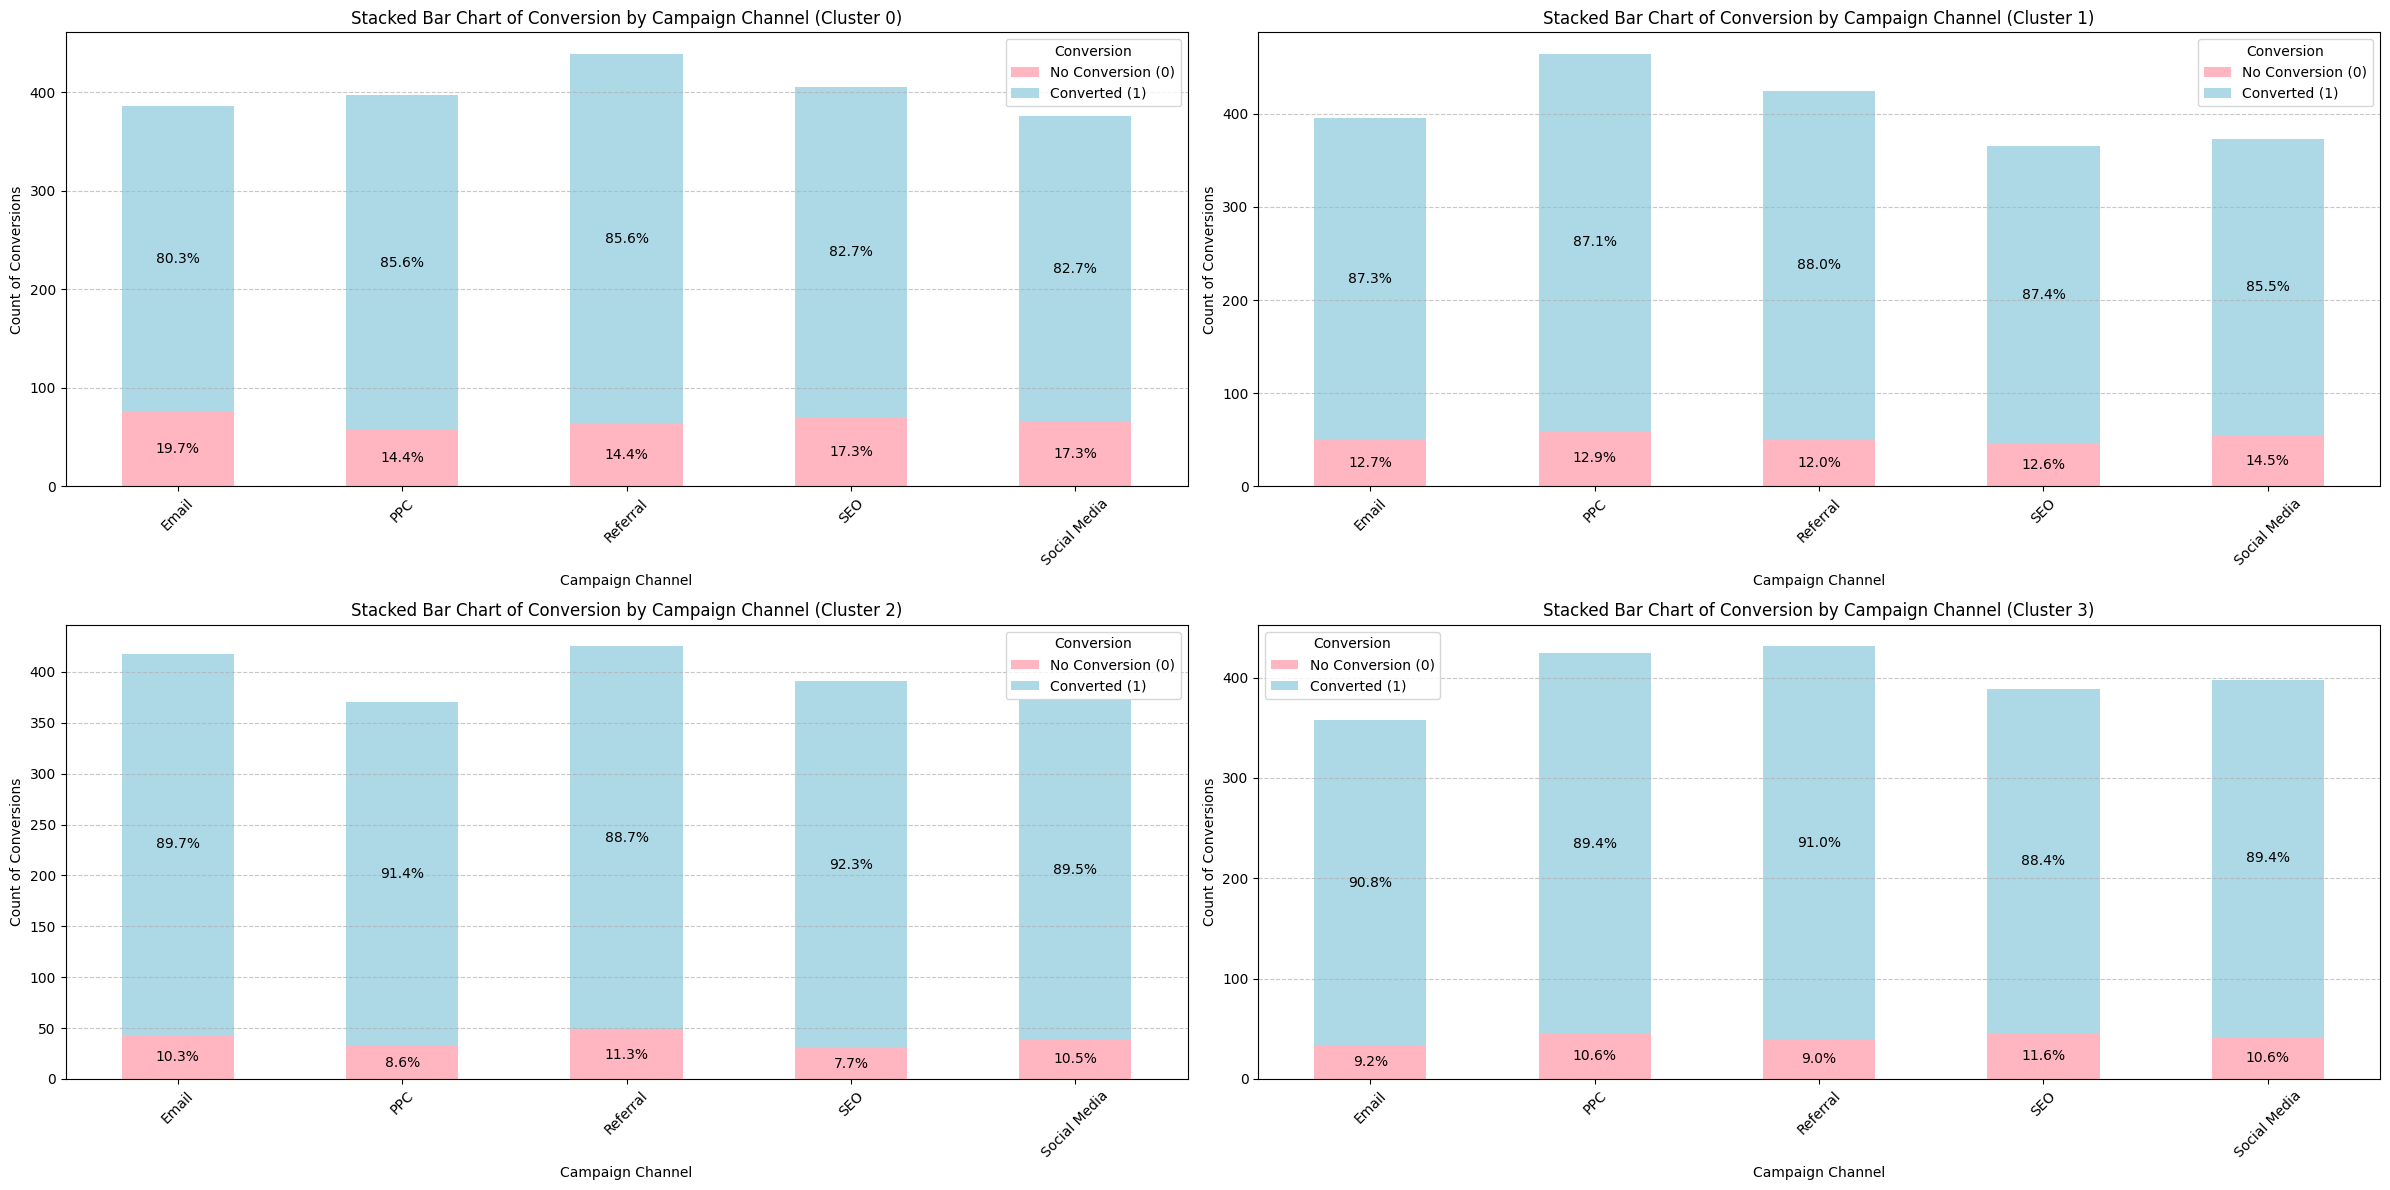

In [204]:
# Lấy danh sách các cụm
clusters = sorted(df['K-means_Cluster'].unique())
n_clusters = len(clusters)
rows = (n_clusters + 1) // 2

# Tạo subplots
fig, axes = plt.subplots(rows, 2, figsize=(24, 6 * rows))
axes = axes.flatten()

for i, cluster in enumerate(clusters):
    cluster_data = df[df['K-means_Cluster'] == cluster]
    conversion_counts = cluster_data.groupby('CampaignChannel')['Conversion'].value_counts().unstack(fill_value=0)
    conversion_percentage = conversion_counts.div(conversion_counts.sum(axis=1), axis=0) * 100
    
    ax = axes[i]
    conversion_counts.plot(kind='bar', stacked=True, ax=ax, color=['#FFB6C1', '#ADD8E6'])  # Màu pastel: Hồng nhạt và xanh dương nhạt

    for j in range(len(conversion_counts)):
        for k in range(len(conversion_counts.columns)):
            percentage = conversion_percentage.iloc[j, k]
            height = conversion_counts.iloc[j, :k+1].sum()
            ax.text(j, height - conversion_counts.iloc[j, k] / 2, f'{percentage:.1f}%', ha='center', va='center')
    
    ax.set_title(f'Stacked Bar Chart of Conversion by Campaign Channel (Cluster {cluster})')
    ax.set_xlabel('Campaign Channel')
    ax.set_ylabel('Count of Conversions')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Conversion', labels=['No Conversion (0)', 'Converted (1)'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### **Nhận xét**: Nhìn chung, các tệp khách hàng đều phản ứng như nhau với các kênh tiếp thị, không có sự khác biệt lớn trong hiệu quả chuyển đổi của các kênh. Tuy nhiên các khách hàng thuộc cụm “Lớn tuổi - Truyền thống” có xu hướng chuyển đổi cao hơn khi với kênh PPC và Referral.

## **5. Hành vi tương tác của các cụm KH**

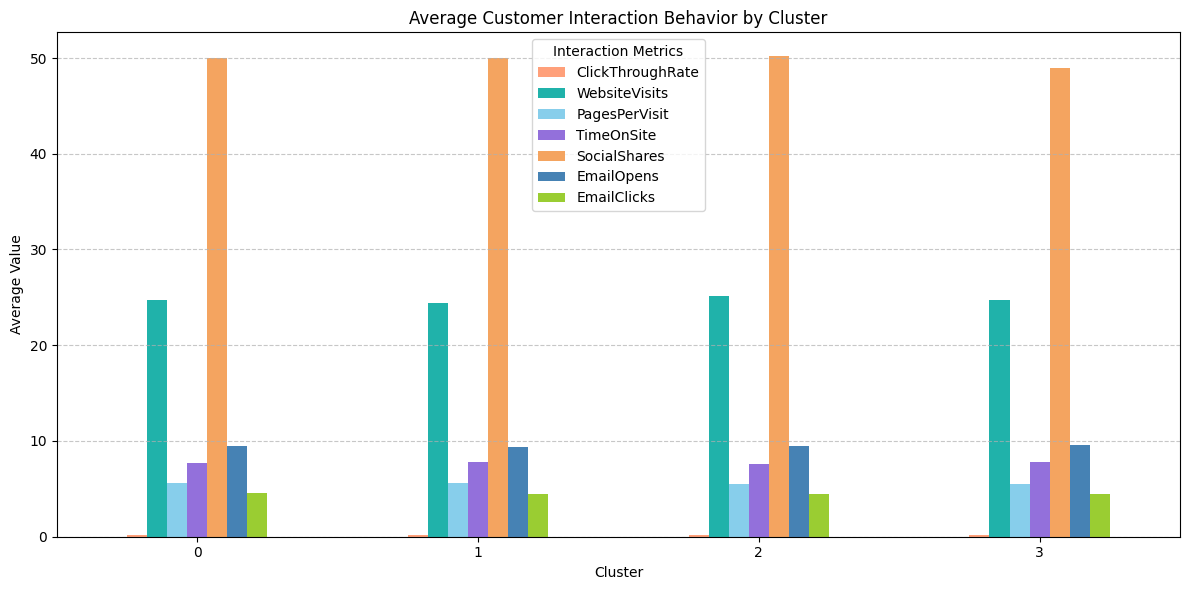

In [201]:
# Danh sách các trường hành vi tương tác
interaction_columns = [
    'ClickThroughRate',
    'WebsiteVisits',
    'PagesPerVisit',
    'TimeOnSite',
    'SocialShares',
    'EmailOpens',
    'EmailClicks',
]

# Tính trung bình của các trường hành vi theo từng cụm
average_interaction = df.groupby('K-means_Cluster')[interaction_columns].mean()

# Vẽ biểu đồ với bảng màu mới
colors = ['#FFA07A', '#20B2AA', '#87CEEB', '#9370DB', '#F4A460', '#4682B4', '#9ACD32']

average_interaction.plot(kind='bar', figsize=(12, 6), color=colors)

# Thiết lập tiêu đề và nhãn
plt.title('Average Customer Interaction Behavior by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Interaction Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### **Nhận xét**: Không có sự khác biệt trong hành vi tương tác giữa các nhóm khách hàng trên tập dữ liệu mẫu này. 

# **III. Kết luận**

### Nhóm "VIP - Lâu năm" là nhóm khách hàng có giá trị nhất, mang lại doanh thu cao và có lòng trung thành. Doanh nghiệp cần tiếp tục duy trì mối quan hệ tốt với nhóm này. 
### Nhóm "Trẻ tuổi - Tiềm năng" có tiềm năng tăng trưởng cao. Việc đầu tư vào nhóm này có thể mang lại lợi nhuận lớn trong tương lai.
### Nhóm "Lớn tuổi - Truyền thống" có tỷ lệ chuyển đổi thấp và ít quan tâm đến các chiến dịch marketing. Doanh nghiệp nên cân nhắc cắt giảm chi phí quảng cáo cho nhóm này.